In [172]:
import gmaps
import numpy as np
import pandas as pd
import os
import scipy.stats as st
import matplotlib.pyplot as plt

# # Google developer API key
# from config import gkey

# # Configure gmaps
# gmaps.configure(api_key=gkey)

#This is the general/common section
path = pd.read_csv('../01._Prospective_Project_Data/1._72199_158097_compressed_indeed_job_dataset.csv/indeed_job_dataset_V3_CSV.csv')
df = pd.DataFrame(path)
df

df.fillna(0) 
df

,Index_No,Job_Title,Link,Queried_Salary,Salary_Index,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,1,data_scientist,"['SAP', 'SQL']",2.0,Express Scripts,3301.0,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,1,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5.0,Money Mart Financial Services,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,1,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9.0,comScore,62.0,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,1,data_scientist,['Certified Internal Auditor'],1.0,Central Intelligence Agency,158.0,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,1,data_scientist,"['Statistical Software', 'Time Management', 'R...",7.0,Federal Reserve Bank of Dallas,495.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,5710,Senior Data Engineer,https://www.indeed.com/rc/clk?jk=fbe2dd71643b3...,>160000,6,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12.0,Intelliswift Software Inc,NaN,...,0,0,0,0,0,0,0,0,0,0
5711,5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",https://www.indeed.com/rc/clk?jk=70ee8b9bb5a2b...,>160000,6,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8.0,Jobspring Partners,31.0,...,0,0,0,0,0,0,0,0,0,1
5712,5712,Executive Director- Architect: Data Engineerin...,https://www.indeed.com/rc/clk?jk=2c2a7f94f6ed1...,>160000,6,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13.0,JPMorgan Chase,21159.0,...,0,0,0,1,0,0,1,0,0,0
5713,5713,"Senior Manager, Data Engineering (hands on)",https://www.indeed.com/rc/clk?jk=1051e100b300b...,>160000,6,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15.0,Capital One,6791.0,...,0,0,0,0,0,0,1,0,0,0


In [4]:
# Drop observations/rows with "0" values for "Number of Skills" column 
df_cleaned = df.dropna(subset=['No_of_Skills'])

# Examine df
df_cleaned.head()
df_cleaned

,Index_No,Job_Title,Link,Queried_Salary,Salary_Index,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,1,data_scientist,"['SAP', 'SQL']",2.0,Express Scripts,3301.0,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,1,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5.0,Money Mart Financial Services,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,1,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9.0,comScore,62.0,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,1,data_scientist,['Certified Internal Auditor'],1.0,Central Intelligence Agency,158.0,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,1,data_scientist,"['Statistical Software', 'Time Management', 'R...",7.0,Federal Reserve Bank of Dallas,495.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,5710,Senior Data Engineer,https://www.indeed.com/rc/clk?jk=fbe2dd71643b3...,>160000,6,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12.0,Intelliswift Software Inc,NaN,...,0,0,0,0,0,0,0,0,0,0
5711,5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",https://www.indeed.com/rc/clk?jk=70ee8b9bb5a2b...,>160000,6,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8.0,Jobspring Partners,31.0,...,0,0,0,0,0,0,0,0,0,1
5712,5712,Executive Director- Architect: Data Engineerin...,https://www.indeed.com/rc/clk?jk=2c2a7f94f6ed1...,>160000,6,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13.0,JPMorgan Chase,21159.0,...,0,0,0,1,0,0,1,0,0,0
5713,5713,"Senior Manager, Data Engineering (hands on)",https://www.indeed.com/rc/clk?jk=1051e100b300b...,>160000,6,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15.0,Capital One,6791.0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
# # Select Columns to keep in df copy
df_cleaned.dtypes
df1 = df_cleaned.drop(columns="Link")
df1 = df1.drop(columns="Description")
df1 = df1.drop(columns="Index_No")
df1.dtypes
                          
# Make DataFrame with just Salary_Index of 6, top income bracket
df1_6 = df1[df1['Salary_Index']==6]
len(df1_6['Salary_Index'])
df1_6

,Job_Title,Queried_Salary,Salary_Index,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
2312,"Data Scientist, Personalization",>160000,6,data_scientist,"['Machine Learning', 'Hadoop', 'Scala', 'Image...",8.0,Nike,6574.0,4.2,1.0,...,0,0,0,1,0,0,0,0,0,1
2313,Data Scientist,>160000,6,data_scientist,"['TensorFlow', 'Data Mining', 'Machine Learnin...",11.0,Stella.ai,NaN,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
2314,Data Scientist,>160000,6,data_scientist,"['Machine Learning', 'Hadoop', 'Project Manage...",13.0,Xilinx,96.0,3.9,1.0,...,0,0,0,0,0,0,0,0,0,1
2315,Data Scientist,>160000,6,data_scientist,"['JavaScript', 'Data Mining', 'Machine Learnin...",18.0,TIBCO Software,30.0,4.1,6.0,...,0,0,0,0,0,1,0,0,0,0
2316,Data Scientist,>160000,6,data_scientist,"['Natural Language Processing', 'Data Mining',...",4.0,"Discovery Communications, LLC",321.0,4.2,30.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,Senior Data Engineer,>160000,6,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12.0,Intelliswift Software Inc,NaN,NaN,30.0,...,0,0,0,0,0,0,0,0,0,0
5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",>160000,6,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8.0,Jobspring Partners,31.0,3.7,30.0,...,0,0,0,0,0,0,0,0,0,1
5712,Executive Director- Architect: Data Engineerin...,>160000,6,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13.0,JPMorgan Chase,21159.0,3.9,22.0,...,0,0,0,1,0,0,1,0,0,0
5713,"Senior Manager, Data Engineering (hands on)",>160000,6,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15.0,Capital One,6791.0,4.0,30.0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
df_ind = df1_6.loc[:,['Queried_Salary', 'Company_Industry']]
df_ind 

df_ind = df_ind.replace('', np.NaN)
df_ind

df_ind=df_ind.replace({'Insurance' : 'Other'})
df_ind=df_ind.replace({'Health Care' : 'Other'})
df_ind=df_ind.replace({'Media, News and Publishing' : 'Other'})
df_ind=df_ind.replace({'Telecommunications' : 'Other'})
df_ind=df_ind.replace({'Industrial Manufacturing' : 'Other'})
df_ind=df_ind.replace({'Pharmaceuticals' : 'Other'})
df_ind=df_ind.replace({'Retail' : 'Other'})
df_ind=df_ind.replace({'Aerospace and Defense' : 'Other'})
df_ind=df_ind.replace({'Auto' : 'Other'})
df_ind=df_ind.replace({'Consumer Goods and Services' : 'Other'})
df_ind=df_ind.replace({'Real Estate' : 'Other'})
df_ind=df_ind.replace({'Construction' : 'Other'})
df_ind=df_ind.replace({'Energy and Utilities' : 'Other'})
df_ind=df_ind.replace({'Restaurants, Travel and LeisureConsulting and Business Services' : 'Other'})
df_ind=df_ind.replace({'Transport and Freight' : 'Other'})
df_ind

,Queried_Salary,Company_Industry
2312,>160000,Other
2313,>160000,NaN
2314,>160000,Other
2315,>160000,Internet and Software
2316,>160000,Other
...,...,...
5710,>160000,NaN
5711,>160000,Human Resources and Staffing
5712,>160000,Banks and Financial Services
5713,>160000,Banks and Financial Services


In [28]:
df_ind = df_ind['Company_Industry'].value_counts()
df_ind
df_ind_sum = pd.DataFrame ({"Industry": df_ind})
df_ind_sum


,Industry
Consulting and Business Services,80
Internet and Software,50
Other,43
Banks and Financial Services,41
Human Resources and Staffing,30
Computers and Electronics,10


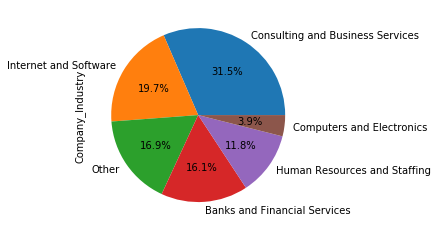

In [29]:
df_ind.plot(kind = 'pie', autopct = '%1.1f%%')

In [47]:
# Top skills by industry
df1['Company_Industry'].value_counts()
# Top five industries are: 
# Consulting and Business Services                                   712
# Internet and Software                                              620
# Banks and Financial Services                                       455
# Health Care                                                        306
# Insurance                                                          214

df_ind2 = df1.loc[:,['Queried_Salary', 'Company_Industry']]
len(df_ind2 )

df_ind2 = df_ind2.replace('', np.NaN)
len(df_ind2)
sum(df_ind2['Company_Industry'].value_counts())
# 3,675 + 1,809 blanks = 5,484 total

# # df_ind2=df_ind2.replace({'Health Care' : 'Other'})
# # df_ind2=df_ind2.replace({'Insurance' : 'Other'})

df_ind2=df_ind2.replace({'Industrial Manufacturing' : 'Other'})
df_ind2=df_ind2.replace({'Aerospace and Defense' : 'Other'})
df_ind2=df_ind2.replace({'Retail' : 'Other'})
df_ind2=df_ind2.replace({'Education and Schools' : 'Other'})
df_ind2=df_ind2.replace({'Computers and Electronics' : 'Other'})
df_ind2=df_ind2.replace({'Consumer Goods and Services' : 'Other'})
df_ind2=df_ind2.replace({'Media, News and Publishing' : 'Other'})
df_ind2=df_ind2.replace({'Human Resources and Staffing' : 'Other'})
df_ind2=df_ind2.replace({'Telecommunications' : 'Other'})
df_ind2=df_ind2.replace({'Government' : 'Other'})
df_ind2=df_ind2.replace({'Pharmaceuticals' : 'Other'})
df_ind2=df_ind2.replace({'Energy and Utilities' : 'Other'})
df_ind2=df_ind2.replace({'Restaurants, Travel and Leisure' : 'Other'})
df_ind2=df_ind2.replace({'Restaurants, Travel and LeisureConsulting and Business Services' : 'Other'})
df_ind2=df_ind2.replace({'Auto' : 'Other'})
df_ind2=df_ind2.replace({'Transport and Freight' : 'Other'})
df_ind2=df_ind2.replace({'InsuranceHealth Care' : 'Other'})
df_ind2=df_ind2.replace({'Real Estate' : 'Other'})
df_ind2=df_ind2.replace({'Organization' : 'Other'})
df_ind2=df_ind2.replace({'Agriculture and Extraction' : 'Other'})
df_ind2=df_ind2.replace({'Food and Beverages' : 'Other'})
df_ind2=df_ind2.replace({'Construction' : 'Other'})
df_ind2=df_ind2.replace({'RetailConsumer Goods and Services' : 'Other'})
df_ind2=df_ind2.replace({'Real EstateReal Estate' : 'Other'})
df_ind2=df_ind2.replace({'Industrial ManufacturingConsumer Goods and Services' : 'Other'})
df_ind2=df_ind2.replace({'Industrial ManufacturingConstruction' : 'Other'})
df_ind2=df_ind2.replace({'Food and BeveragesConsulting and Business Services' : 'Other'})
df_ind2=df_ind2.replace({'Industrial ManufacturingAgriculture and Extraction' : 'Other'})
# sum(df_ind2['Company_Industry'].value_counts())
# 3,675 is count, none lost in process


In [48]:
df_ind2 = df_ind2['Company_Industry'].value_counts()
df_ind2
df_ind2_sum = pd.DataFrame ({"Industry": df_ind2})
df_ind2_sum



,Industry
Other,1368
Consulting and Business Services,712
Internet and Software,620
Banks and Financial Services,455
Health Care,306
Insurance,214


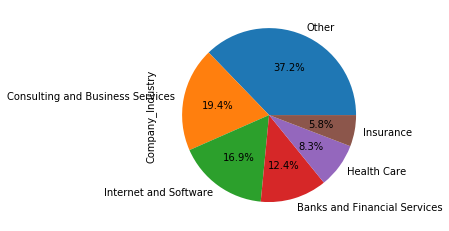

In [49]:
df_ind2.plot(kind = 'pie', autopct = '%1.1f%%')

In [156]:
# Make Dataset for just Industry = Consulting and Business Services
df1_CBS = df1[df1['Company_Industry']=='Consulting and Business Services']
df1_CBS

CBS_sum_Py = sum(df1_CBS['python'])
CBS_sum_Py
CBS_sum_SQL = sum(df1_CBS['sql'])
CBS_sum_ML = sum(df1_CBS['machine learning'])
CBS_sum_R = sum(df1_CBS['r'])
CBS_sum_Had = sum(df1_CBS['hadoop'])
CBS_sum_Tab = sum(df1_CBS['tableau'])
CBS_sum_SAS = sum(df1_CBS['sas'])
CBS_sum_Spark = sum(df1_CBS['spark'])
CBS_sum_Java = sum(df1_CBS['java'])
CBS_sum_Others = sum(df1_CBS['Others'])

# Make Dataset for just Industry = Consulting and Business Services
df1_CBS = df1[df1['Company_Industry']=='Consulting and Business Services']
df1_CBS
CBS_sum_Total = len(df1_CBS)

CBS_sum_Py = sum(df1_CBS['python'])
CBS_sum_Py
CBS_sum_SQL = sum(df1_CBS['sql'])
CBS_sum_ML = sum(df1_CBS['machine learning'])
CBS_sum_R = sum(df1_CBS['r'])
CBS_sum_Had = sum(df1_CBS['hadoop'])
CBS_sum_Tab = sum(df1_CBS['tableau'])
CBS_sum_SAS = sum(df1_CBS['sas'])
CBS_sum_Spark = sum(df1_CBS['spark'])
CBS_sum_Java = sum(df1_CBS['java'])
CBS_sum_Others = sum(df1_CBS['Others'])

# Make Dataset for just Industry = Internet and Software
df1_IS = df1[df1['Company_Industry']=='Internet and Software']
df1_IS
IS_sum_Total = len(df1_IS)

IS_sum_Py = sum(df1_IS['python'])
IS_sum_Py
IS_sum_SQL = sum(df1_IS['sql'])
IS_sum_ML = sum(df1_IS['machine learning'])
IS_sum_R = sum(df1_IS['r'])
IS_sum_Had = sum(df1_IS['hadoop'])
IS_sum_Tab = sum(df1_IS['tableau'])
IS_sum_SAS = sum(df1_IS['sas'])
IS_sum_Spark = sum(df1_IS['spark'])
IS_sum_Java = sum(df1_IS['java'])
IS_sum_Others = sum(df1_IS['Others'])

# Make Dataset for just Industry = Banks and Financial Services
df1_BFS = df1[df1['Company_Industry']=='Banks and Financial Services']
df1_BFS
BFS_sum_Total = len(df1_BFS)

BFS_sum_Py = sum(df1_BFS['python'])
BFS_sum_Py
BFS_sum_SQL = sum(df1_BFS['sql'])
BFS_sum_ML = sum(df1_BFS['machine learning'])
BFS_sum_R = sum(df1_BFS['r'])
BFS_sum_Had = sum(df1_BFS['hadoop'])
BFS_sum_Tab = sum(df1_BFS['tableau'])
BFS_sum_SAS = sum(df1_BFS['sas'])
BFS_sum_Spark = sum(df1_BFS['spark'])
BFS_sum_Java = sum(df1_BFS['java'])
BFS_sum_Others = sum(df1_BFS['Others'])

# Make Dataset for just Industry = Health Care
df1_HC = df1[df1['Company_Industry']== 'Health Care']
df1_HC
HC_sum_Total = len(df1_HC)

HC_sum_Py = sum(df1_HC['python'])
HC_sum_Py
HC_sum_SQL = sum(df1_HC['sql'])
HC_sum_ML = sum(df1_HC['machine learning'])
HC_sum_R = sum(df1_HC['r'])
HC_sum_Had = sum(df1_HC['hadoop'])
HC_sum_Tab = sum(df1_HC['tableau'])
HC_sum_SAS = sum(df1_HC['sas'])
HC_sum_Spark = sum(df1_HC['spark'])
HC_sum_Java = sum(df1_HC['java'])
HC_sum_Others = sum(df1_HC['Others'])

# Make Dataset for just Industry = Insurance
df1_I = df1[df1['Company_Industry']== 'Insurance']
df1_I
I_sum_Total = len(df1_I)

I_sum_Py = sum(df1_I['python'])
I_sum_Py
I_sum_SQL = sum(df1_I['sql'])
I_sum_ML = sum(df1_I['machine learning'])
I_sum_R = sum(df1_I['r'])
I_sum_Had = sum(df1_I['hadoop'])
I_sum_Tab = sum(df1_I['tableau'])
I_sum_SAS = sum(df1_I['sas'])
I_sum_Spark = sum(df1_I['spark'])
I_sum_Java = sum(df1_I['java'])
I_sum_Others = sum(df1_I['Others'])



In [100]:
# df = pd.DataFrame({'Name':['Tom', 'nick', 'krish', 'jack'],
#         'Age':[20, 21, 19, 18]})

Skill= ['python', 'sql','machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java', 'Others', 'Total']
CBS = [CBS_sum_Py, CBS_sum_SQL, CBS_sum_ML, CBS_sum_R, CBS_sum_Had, CBS_sum_Tab, CBS_sum_SAS, CBS_sum_Spark, CBS_sum_Java, CBS_sum_Others, CBS_sum_Total]
IS = [IS_sum_Py, IS_sum_SQL, IS_sum_ML, IS_sum_R, IS_sum_Had, IS_sum_Tab, IS_sum_SAS, IS_sum_Spark, IS_sum_Java, IS_sum_Others, IS_sum_Total]
BFS = [BFS_sum_Py, BFS_sum_SQL, BFS_sum_ML, BFS_sum_R, BFS_sum_Had, BFS_sum_Tab, BFS_sum_SAS, BFS_sum_Spark, BFS_sum_Java, BFS_sum_Others, BFS_sum_Total]
HC = [HC_sum_Py, HC_sum_SQL, HC_sum_ML, HC_sum_R, HC_sum_Had, HC_sum_Tab, HC_sum_SAS, HC_sum_Spark, HC_sum_Java, HC_sum_Others, HC_sum_Total]
I = [I_sum_Py, I_sum_SQL, I_sum_ML, I_sum_R, I_sum_Had, I_sum_Tab, I_sum_SAS, I_sum_Spark, I_sum_Java, I_sum_Others, I_sum_Total]

industry_sum = pd.DataFrame({
    'Skill':Skill,
    'Consulting and Business Services': CBS,
    'Internet and Software': IS,
    'Banks and Financial Services': BFS,
    'Health Care': HC,
    'Insurance': I
})
industry_sum

# .map("%1.1f%%".format)


,Skill,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance
0,python,426,432,264,126,124
1,sql,338,376,267,180,135
2,machine learning,340,291,187,86,85
3,r,275,266,171,112,103
4,hadoop,270,242,165,56,93
5,tableau,200,105,105,82,49
6,sas,121,82,96,92,59
7,spark,235,212,160,51,35
8,java,172,192,155,53,69
9,Others,658,583,436,290,194


In [102]:

# Make Dataset for just Industry = Consulting and Business Services
df1_CBS = df1[df1['Company_Industry']=='Consulting and Business Services']
df1_CBS
CBS_sum_Total = len(df1_CBS)

CBS_sum_Py_p = sum(df1_CBS['python'])/CBS_sum_Total
CBS_sum_Py_p
CBS_sum_SQL_p = sum(df1_CBS['sql'])/CBS_sum_Total
CBS_sum_ML_p = sum(df1_CBS['machine learning'])/CBS_sum_Total
CBS_sum_R_p = sum(df1_CBS['r'])/CBS_sum_Total
CBS_sum_Had_p = sum(df1_CBS['hadoop'])/CBS_sum_Total
CBS_sum_Tab_p = sum(df1_CBS['tableau'])/CBS_sum_Total
CBS_sum_SAS_p = sum(df1_CBS['sas'])/CBS_sum_Total
CBS_sum_Spark_p = sum(df1_CBS['spark'])/CBS_sum_Total
CBS_sum_Java_p = sum(df1_CBS['java'])/CBS_sum_Total
CBS_sum_Others_p = sum(df1_CBS['Others'])/CBS_sum_Total

# Make Dataset for just Industry = Internet and Software
df1_IS = df1[df1['Company_Industry']=='Internet and Software']
df1_IS
IS_sum_Total = len(df1_IS)

IS_sum_Py_p = sum(df1_IS['python'])/IS_sum_Total
IS_sum_Py_p
IS_sum_SQL_p = sum(df1_IS['sql'])/IS_sum_Total
IS_sum_ML_p = sum(df1_IS['machine learning'])/IS_sum_Total
IS_sum_R_p = sum(df1_IS['r'])/IS_sum_Total
IS_sum_Had_p = sum(df1_IS['hadoop'])/IS_sum_Total
IS_sum_Tab_p = sum(df1_IS['tableau'])/IS_sum_Total
IS_sum_SAS_p = sum(df1_IS['sas'])/IS_sum_Total
IS_sum_Spark_p = sum(df1_IS['spark'])/IS_sum_Total
IS_sum_Java_p = sum(df1_IS['java'])/IS_sum_Total
IS_sum_Others_p = sum(df1_IS['Others'])/IS_sum_Total

# Make Dataset for just Industry = Banks and Financial Services
df1_BFS = df1[df1['Company_Industry']=='Banks and Financial Services']
df1_BFS
BFS_sum_Total = len(df1_BFS)

BFS_sum_Py_p = sum(df1_BFS['python'])/BFS_sum_Total
BFS_sum_Py_p
BFS_sum_SQL_p = sum(df1_BFS['sql'])/BFS_sum_Total
BFS_sum_ML_p = sum(df1_BFS['machine learning'])/BFS_sum_Total
BFS_sum_R_p = sum(df1_BFS['r'])/BFS_sum_Total
BFS_sum_Had_p = sum(df1_BFS['hadoop'])/BFS_sum_Total
BFS_sum_Tab_p = sum(df1_BFS['tableau'])/BFS_sum_Total
BFS_sum_SAS_p = sum(df1_BFS['sas'])/BFS_sum_Total
BFS_sum_Spark_p = sum(df1_BFS['spark'])/BFS_sum_Total
BFS_sum_Java_p = sum(df1_BFS['java'])/BFS_sum_Total
BFS_sum_Others_p = sum(df1_BFS['Others'])/BFS_sum_Total

# Make Dataset for just Industry = Health Care
df1_HC = df1[df1['Company_Industry']== 'Health Care']
df1_HC
HC_sum_Total = len(df1_HC)

HC_sum_Py_p = sum(df1_HC['python'])/HC_sum_Total
HC_sum_Py_p
HC_sum_SQL_p = sum(df1_HC['sql'])/HC_sum_Total
HC_sum_ML_p = sum(df1_HC['machine learning'])/HC_sum_Total
HC_sum_R_p = sum(df1_HC['r'])/HC_sum_Total
HC_sum_Had_p = sum(df1_HC['hadoop'])/HC_sum_Total
HC_sum_Tab_p = sum(df1_HC['tableau'])/HC_sum_Total
HC_sum_SAS_p = sum(df1_HC['sas'])/HC_sum_Total
HC_sum_Spark_p = sum(df1_HC['spark'])/HC_sum_Total
HC_sum_Java_p = sum(df1_HC['java'])/HC_sum_Total
HC_sum_Others_p = sum(df1_HC['Others'])/HC_sum_Total

# Make Dataset for just Industry = Insurance
df1_I = df1[df1['Company_Industry']== 'Insurance']
df1_I
I_sum_Total = len(df1_I)

I_sum_Py_p = sum(df1_I['python'])/I_sum_Total
I_sum_Py_p
I_sum_SQL_p = sum(df1_I['sql'])/I_sum_Total
I_sum_ML_p = sum(df1_I['machine learning'])/I_sum_Total
I_sum_R_p = sum(df1_I['r'])/I_sum_Total
I_sum_Had_p = sum(df1_I['hadoop'])/I_sum_Total
I_sum_Tab_p = sum(df1_I['tableau'])/I_sum_Total
I_sum_SAS_p = sum(df1_I['sas'])/I_sum_Total
I_sum_Spark_p = sum(df1_I['spark'])/I_sum_Total
I_sum_Java_p = sum(df1_I['java'])/I_sum_Total
I_sum_Others_p = sum(df1_I['Others'])/I_sum_Total



In [153]:
# df = pd.DataFrame({'Name':['Tom', 'nick', 'krish', 'jack'],
#         'Age':[20, 21, 19, 18]})

Skill= ['python', 'sql','machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java', 'Others', 'Total']
CBS = ["{:.2%}".format(CBS_sum_Py_p), 
       "{:.2%}".format(CBS_sum_SQL_p), 
       "{:.2%}".format(CBS_sum_ML_p), 
       "{:.2%}".format(CBS_sum_R_p), 
       "{:.2%}".format(CBS_sum_Had_p), 
       "{:.2%}".format(CBS_sum_Tab_p), 
       "{:.2%}".format(CBS_sum_SAS_p), 
       "{:.2%}".format(CBS_sum_Spark_p), 
       "{:.2%}".format(CBS_sum_Java_p), 
       "{:.2%}".format(CBS_sum_Others_p), 
       CBS_sum_Total]
IS = ["{:.2%}".format(IS_sum_Py_p), 
      "{:.2%}".format(IS_sum_SQL_p), 
      "{:.2%}".format(IS_sum_ML_p), 
      "{:.2%}".format(IS_sum_R_p), 
      "{:.2%}".format(IS_sum_Had_p), 
      "{:.2%}".format(IS_sum_Tab_p), 
      "{:.2%}".format(IS_sum_SAS_p), 
      "{:.2%}".format(IS_sum_Spark_p), 
      "{:.2%}".format(IS_sum_Java_p), 
      "{:.2%}".format(IS_sum_Others_p), 
      IS_sum_Total]
BFS = ["{:.2%}".format(BFS_sum_Py_p), 
       "{:.2%}".format(BFS_sum_SQL_p), 
       "{:.2%}".format(BFS_sum_ML_p), 
       "{:.2%}".format(BFS_sum_R_p), 
       "{:.2%}".format(BFS_sum_Had_p), 
       "{:.2%}".format(BFS_sum_Tab_p), 
       "{:.2%}".format(BFS_sum_SAS_p), 
       "{:.2%}".format(BFS_sum_Spark_p), 
       "{:.2%}".format(BFS_sum_Java_p), 
       "{:.2%}".format(BFS_sum_Others_p), 
       BFS_sum_Total]
HC = ["{:.2%}".format(HC_sum_Py_p), 
      "{:.2%}".format(HC_sum_SQL_p), 
      "{:.2%}".format(HC_sum_ML_p), 
      "{:.2%}".format(HC_sum_R_p), 
      "{:.2%}".format(HC_sum_Had_p), 
      "{:.2%}".format(HC_sum_Tab_p), 
      "{:.2%}".format(HC_sum_SAS_p), 
      "{:.2%}".format(HC_sum_Spark_p), 
      "{:.2%}".format(HC_sum_Java_p), 
      "{:.2%}".format(HC_sum_Others_p), 
      HC_sum_Total]
I = ["{:.2%}".format(I_sum_Py_p),
     "{:.2%}".format(I_sum_SQL_p),
     "{:.2%}".format(I_sum_ML_p),
     "{:.2%}".format(I_sum_R_p),
     "{:.2%}".format(I_sum_Had_p),
     "{:.2%}".format(I_sum_Tab_p),
     "{:.2%}".format(I_sum_SAS_p),
     "{:.2%}".format(I_sum_Spark_p),
     "{:.2%}".format(I_sum_Java_p),
     "{:.2%}".format(I_sum_Others_p),
     I_sum_Total]

industry_sum_p = pd.DataFrame({
    'Skill':Skill,
    'Consulting and Business Services': CBS,
    'Internet and Software': IS,
    'Banks and Financial Services': BFS,
    'Health Care': HC,
    'Insurance': I
})
industry_sum_p



,Skill,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance
0,python,59.83%,69.68%,58.02%,41.18%,57.94%
1,sql,47.47%,60.65%,58.68%,58.82%,63.08%
2,machine learning,47.75%,46.94%,41.10%,28.10%,39.72%
3,r,38.62%,42.90%,37.58%,36.60%,48.13%
4,hadoop,37.92%,39.03%,36.26%,18.30%,43.46%
5,tableau,28.09%,16.94%,23.08%,26.80%,22.90%
6,sas,16.99%,13.23%,21.10%,30.07%,27.57%
7,spark,33.01%,34.19%,35.16%,16.67%,16.36%
8,java,24.16%,30.97%,34.07%,17.32%,32.24%
9,Others,92.42%,94.03%,95.82%,94.77%,90.65%


In [181]:
# df = pd.DataFrame({'Name':['Tom', 'nick', 'krish', 'jack'],
#         'Age':[20, 21, 19, 18]}

Skill= ['python', 'sql','machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java', 'Others']
CBS = [CBS_sum_Py_p, 
       CBS_sum_SQL_p, 
       CBS_sum_ML_p, 
       CBS_sum_R_p, 
       CBS_sum_Had_p, 
       CBS_sum_Tab_p, 
       CBS_sum_SAS_p, 
       CBS_sum_Spark_p, 
       CBS_sum_Java_p, 
       CBS_sum_Others_p]
IS = [IS_sum_Py_p, 
      IS_sum_SQL_p, 
      IS_sum_ML_p, 
      IS_sum_R_p, 
      IS_sum_Had_p, 
      IS_sum_Tab_p, 
      IS_sum_SAS_p, 
      IS_sum_Spark_p, 
      IS_sum_Java_p, 
      IS_sum_Others_p]
BFS = [BFS_sum_Py_p, 
       BFS_sum_SQL_p, 
       BFS_sum_ML_p, 
       BFS_sum_R_p, 
       BFS_sum_Had_p, 
       BFS_sum_Tab_p, 
       BFS_sum_SAS_p, 
       BFS_sum_Spark_p, 
       BFS_sum_Java_p, 
       BFS_sum_Others_p]
HC = [HC_sum_Py_p, 
      HC_sum_SQL_p, 
      HC_sum_ML_p, 
      HC_sum_R_p, 
      HC_sum_Had_p, 
      HC_sum_Tab_p, 
      HC_sum_SAS_p, 
      HC_sum_Spark_p, 
      HC_sum_Java_p, 
      HC_sum_Others_p]
I = [I_sum_Py_p,
     I_sum_SQL_p,
     I_sum_ML_p,
     I_sum_R_p,
     I_sum_Had_p,
     I_sum_Tab_p,
     I_sum_SAS_p,
     I_sum_Spark_p,
     I_sum_Java_p,
     I_sum_Others_p]

industry_sum_no_p = pd.DataFrame({
    'Skill':Skill,
    'Consulting and Business Services': CBS,
    'Internet and Software': IS,
    'Banks and Financial Services': BFS,
    'Health Care': HC,
    'Insurance': I
})
industry_sum_no_p


,Skill,Consulting and/n Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance
0,python,0.598315,0.696774,0.580220,0.411765,0.579439
1,sql,0.474719,0.606452,0.586813,0.588235,0.630841
2,machine learning,0.477528,0.469355,0.410989,0.281046,0.397196
3,r,0.386236,0.429032,0.375824,0.366013,0.481308
4,hadoop,0.379213,0.390323,0.362637,0.183007,0.434579
5,tableau,0.280899,0.169355,0.230769,0.267974,0.228972
6,sas,0.169944,0.132258,0.210989,0.300654,0.275701
7,spark,0.330056,0.341935,0.351648,0.166667,0.163551
8,java,0.241573,0.309677,0.340659,0.173203,0.322430
9,Others,0.924157,0.940323,0.958242,0.947712,0.906542


Text(0, 0.5, 'Presence of Skill in Job Description\n (Percentage)')

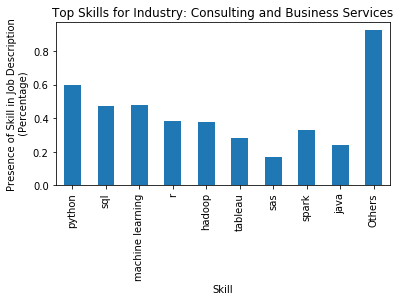

In [176]:
CBSbar = industry_sum_no_p.loc[:, ['Skill', 'Consulting and Business Services']]
CBSbar = CBSbar.set_index(['Skill'])
CBSbar 
#= CBSbar['Consulting and Business Services'].mean()
CBSbar 
# = pd.DataFrame[["G":CBSbar]]
# CBSbar.plot(kind = 'bar', autopct = '%1.1f%%')

x_axis = CBSbar['Consulting and Business Services']

x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Consulting and Business Services")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


Text(0, 0.5, 'Presence of Skill in Job Description\n (Percentage)')

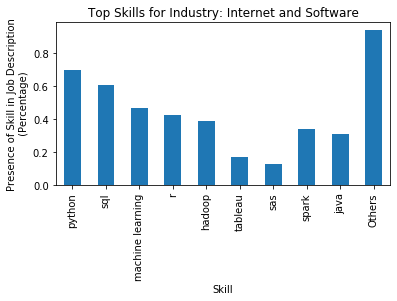

In [177]:
ISbar = industry_sum_no_p.loc[:, ['Skill', 'Internet and Software']]
ISbar = ISbar.set_index(['Skill'])
ISbar 
#= CBSbar['Consulting and Business Services'].mean()
# CBSbar 
# = pd.DataFrame[["G":CBSbar]]
# CBSbar.plot(kind = 'bar', autopct = '%1.1f%%')

x_axis = ISbar['Internet and Software']

x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Internet and Software")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


Text(0, 0.5, 'Presence of Skill in Job Description\n (Percentage)')

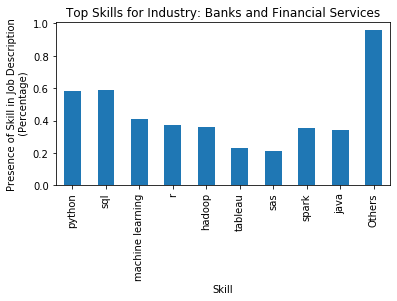

In [182]:
BFSbar = industry_sum_no_p.loc[:, ['Skill', 'Banks and Financial Services']]
BFSbar = BFSbar.set_index(['Skill'])
BFSbar 
#= CBSbar['Consulting and Business Services'].mean()
# CBSbar 
# = pd.DataFrame[["G":CBSbar]]
# CBSbar.plot(kind = 'bar', autopct = '%1.1f%%')

x_axis = BFSbar['Banks and Financial Services']

x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Banks and Financial Services")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


Text(0, 0.5, 'Presence of Skill in Job Description\n (Percentage)')

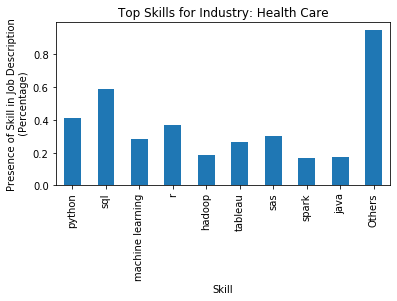

In [183]:
HCbar = industry_sum_no_p.loc[:, ['Skill', 'Health Care']]
HCbar = HCbar.set_index(['Skill'])
HCbar 
#= CBSbar['Consulting and Business Services'].mean()
# CBSbar 
# = pd.DataFrame[["G":CBSbar]]
# CBSbar.plot(kind = 'bar', autopct = '%1.1f%%')

x_axis = HCbar['Health Care']

x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Health Care")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


Text(0, 0.5, 'Presence of Skill in Job Description\n (Percentage)')

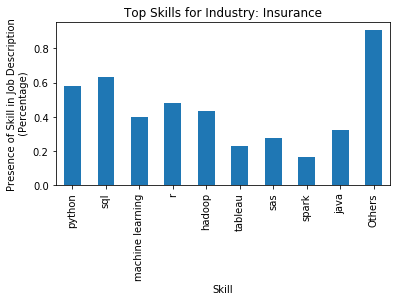

In [184]:
Ibar = industry_sum_no_p.loc[:, ['Skill', 'Insurance']]
Ibar = Ibar.set_index(['Skill'])
Ibar 
#= CBSbar['Consulting and Business Services'].mean()
# CBSbar 
# = pd.DataFrame[["G":CBSbar]]
# CBSbar.plot(kind = 'bar', autopct = '%1.1f%%')

x_axis = Ibar['Insurance']

x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Insurance")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


In [186]:
# df = pd.DataFrame({'Name':['Tom', 'nick', 'krish', 'jack'],
#         'Age':[20, 21, 19, 18]}

Skill= ['python', 'sql','machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java']
CBS = [CBS_sum_Py_p, 
       CBS_sum_SQL_p, 
       CBS_sum_ML_p, 
       CBS_sum_R_p, 
       CBS_sum_Had_p, 
       CBS_sum_Tab_p, 
       CBS_sum_SAS_p, 
       CBS_sum_Spark_p, 
       CBS_sum_Java_p]
IS = [IS_sum_Py_p, 
      IS_sum_SQL_p, 
      IS_sum_ML_p, 
      IS_sum_R_p, 
      IS_sum_Had_p, 
      IS_sum_Tab_p, 
      IS_sum_SAS_p, 
      IS_sum_Spark_p, 
      IS_sum_Java_p]
BFS = [BFS_sum_Py_p, 
       BFS_sum_SQL_p, 
       BFS_sum_ML_p, 
       BFS_sum_R_p, 
       BFS_sum_Had_p, 
       BFS_sum_Tab_p, 
       BFS_sum_SAS_p, 
       BFS_sum_Spark_p, 
       BFS_sum_Java_p]
HC = [HC_sum_Py_p, 
      HC_sum_SQL_p, 
      HC_sum_ML_p, 
      HC_sum_R_p, 
      HC_sum_Had_p, 
      HC_sum_Tab_p, 
      HC_sum_SAS_p, 
      HC_sum_Spark_p, 
      HC_sum_Java_p]
I = [I_sum_Py_p,
     I_sum_SQL_p,
     I_sum_ML_p,
     I_sum_R_p,
     I_sum_Had_p,
     I_sum_Tab_p,
     I_sum_SAS_p,
     I_sum_Spark_p,
     I_sum_Java_p]

industry_sum_no_p_no_o = pd.DataFrame({
    'Skill':Skill,
    'Consulting and Business Services': CBS,
    'Internet and Software': IS,
    'Banks and Financial Services': BFS,
    'Health Care': HC,
    'Insurance': I
})
industry_sum_no_p_no_o


,Skill,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance
0,python,0.598315,0.696774,0.580220,0.411765,0.579439
1,sql,0.474719,0.606452,0.586813,0.588235,0.630841
2,machine learning,0.477528,0.469355,0.410989,0.281046,0.397196
3,r,0.386236,0.429032,0.375824,0.366013,0.481308
4,hadoop,0.379213,0.390323,0.362637,0.183007,0.434579
5,tableau,0.280899,0.169355,0.230769,0.267974,0.228972
6,sas,0.169944,0.132258,0.210989,0.300654,0.275701
7,spark,0.330056,0.341935,0.351648,0.166667,0.163551
8,java,0.241573,0.309677,0.340659,0.173203,0.322430


Text(0, 0.5, 'Presence of Skill in Job Description\n (Percentage)')

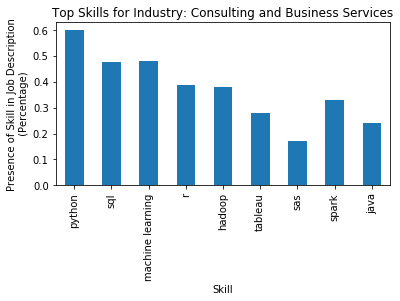

In [187]:
CBSbar = industry_sum_no_p_no_o.loc[:, ['Skill', 'Consulting and Business Services']]
CBSbar = CBSbar.set_index(['Skill'])
CBSbar 
#= CBSbar['Consulting and Business Services'].mean()
CBSbar 
# = pd.DataFrame[["G":CBSbar]]
# CBSbar.plot(kind = 'bar', autopct = '%1.1f%%')

x_axis = CBSbar['Consulting and Business Services']

x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Consulting and Business Services")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


Text(0, 0.5, 'Presence of Skill in Job Description\n (Percentage)')

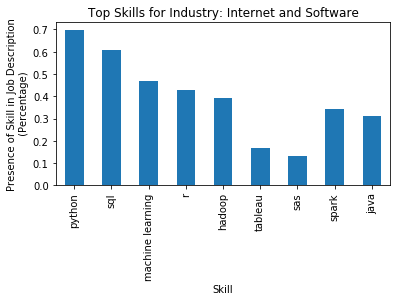

In [188]:
ISbar = industry_sum_no_p_no_o.loc[:, ['Skill', 'Internet and Software']]
ISbar = ISbar.set_index(['Skill'])
ISbar 
#= CBSbar['Consulting and Business Services'].mean()
# CBSbar 
# = pd.DataFrame[["G":CBSbar]]
# CBSbar.plot(kind = 'bar', autopct = '%1.1f%%')

x_axis = ISbar['Internet and Software']

x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Internet and Software")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


Text(0, 0.5, 'Presence of Skill in Job Description\n (Percentage)')

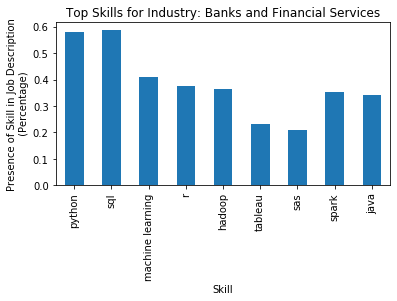

In [189]:
BFSbar = industry_sum_no_p_no_o.loc[:, ['Skill', 'Banks and Financial Services']]
BFSbar = BFSbar.set_index(['Skill'])
BFSbar 
#= CBSbar['Consulting and Business Services'].mean()
# CBSbar 
# = pd.DataFrame[["G":CBSbar]]
# CBSbar.plot(kind = 'bar', autopct = '%1.1f%%')

x_axis = BFSbar['Banks and Financial Services']

x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Banks and Financial Services")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


Text(0, 0.5, 'Presence of Skill in Job Description\n (Percentage)')

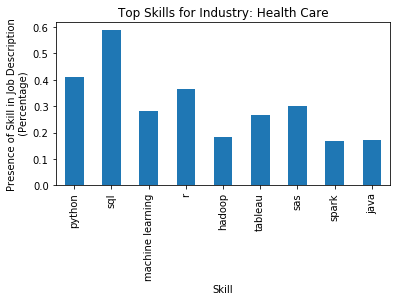

In [190]:
HCbar = industry_sum_no_p_no_o.loc[:, ['Skill', 'Health Care']]
HCbar = HCbar.set_index(['Skill'])
HCbar 
#= CBSbar['Consulting and Business Services'].mean()
# CBSbar 
# = pd.DataFrame[["G":CBSbar]]
# CBSbar.plot(kind = 'bar', autopct = '%1.1f%%')

x_axis = HCbar['Health Care']

x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Health Care")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


Text(0, 0.5, 'Presence of Skill in Job Description\n (Percentage)')

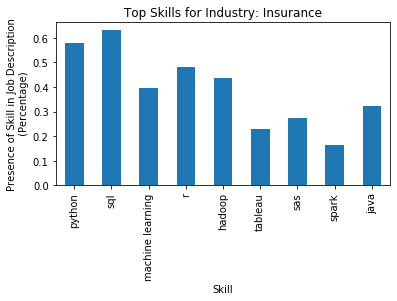

In [191]:
Ibar = industry_sum_no_p_no_o.loc[:, ['Skill', 'Insurance']]
Ibar = Ibar.set_index(['Skill'])
Ibar 
#= CBSbar['Consulting and Business Services'].mean()
# CBSbar 
# = pd.DataFrame[["G":CBSbar]]
# CBSbar.plot(kind = 'bar', autopct = '%1.1f%%')

x_axis = Ibar['Insurance']

x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Insurance")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


In [ ]:
#######
# replacement_list = ['Insurance',
# 'Health Care',
# 'Media, News and Publishing',
# 'Telecommunications',
# 'Industrial Manufacturing',
# 'Pharmaceuticals',
# 'Retail',
# 'Aerospace and Defense',
# 'Auto',
# 'Consumer Goods and Services',
# 'Real Estate',
# 'Construction',
# 'Energy and Utilities',
# 'Restaurants, Travel and LeisureConsulting and Business Services',
# 'Transport and Freight']

# for i in replacement_list:
#     df_ind1=df_ind.replace({i : 'Other'})
# df_ind1

# for index, row in df_ind1.iterrows():
#     row['1'] = "I am working!"


# for i, row in df_ind.iterrows():
#     df_ind1=df_ind.loc[i,'price_new']  = i 

# for i in replacement_list:
#     df_ind1=df_ind.replace(i : 'Other')
# df_ind1

#######
# Salary_Index = df.iloc[:,4]
# No_of_Skills = df.iloc[:,7]
# correlation = st.pearsonr(Salary_Index,No_of_Skills)

In [43]:
output_data_v1 = df_ind2.to_csv(r'../04._Output/output_data_v1.csv') 